Null values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Dataset description:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%       

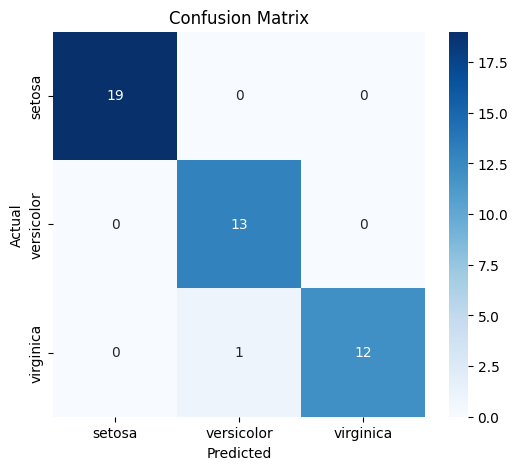


Predicted class for the new sample: setosa


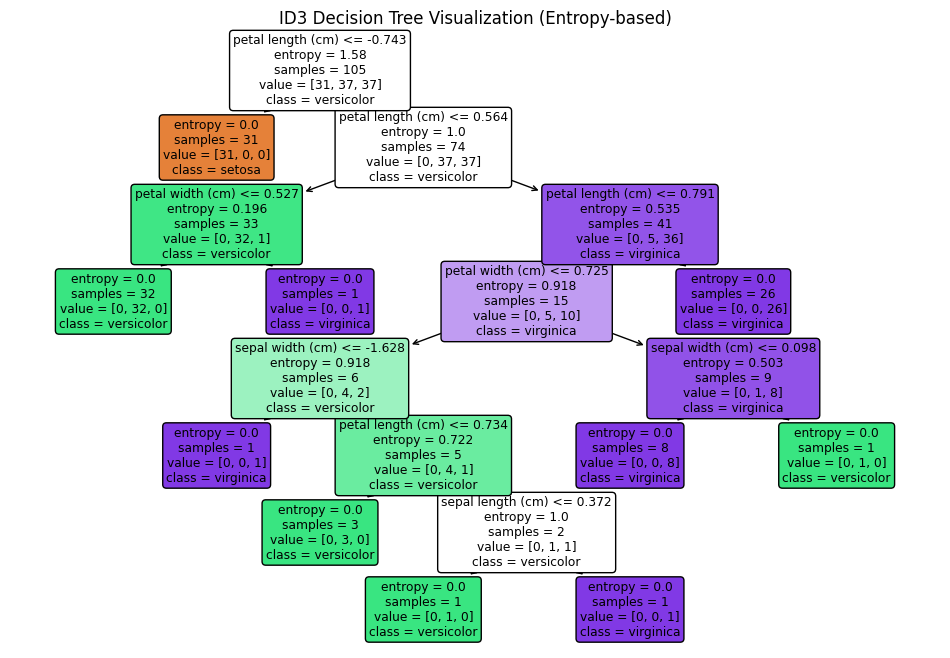

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report)
from sklearn import tree

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# --- Preprocessing ---
print("Null values in dataset:\n", df.isnull().sum())
print("\nDataset description:\n", df.describe())

# Optional: Feature Scaling (not needed for Decision Trees, shown for practice)
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target  # Already numeric, no label encoding needed

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Training the ID3 Decision Tree ---
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)  # ID3 = 'entropy'
clf.fit(X_train, y_train)

# Evaluate model performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Predict a new sample ---
new_sample = [[2.0, 1.4, 1.5, 0.2]]  # Example feature values (raw scale)
new_sample_scaled = scaler.transform(new_sample)
predicted_class = clf.predict(new_sample_scaled)
print(f"\nPredicted class for the new sample: {data.target_names[predicted_class[0]]}")

# --- Visualize the Decision Tree ---
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names,
               class_names=data.target_names, rounded=True)
plt.title("ID3 Decision Tree Visualization (Entropy-based)")
plt.show()